# Pandas crash course


<img align="center" src="https://github.com/dfbarrero/dataCourse/raw/master/pandas/figs/pandas.png" width="300">



### Library imports

In [1]:
import pandas as pd

In [2]:
import numpy as np # Pandas and NumPy use to be together

## The Series object

In [3]:
series = pd.Series([0.25, 0.5, 0.75, 1.0])

print(series)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


In [4]:
series[1:3]

1    0.50
2    0.75
dtype: float64

In [5]:
series = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

series

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

| Index       | Values |
|-----|-----------|
| 'a' | 0.25  | 
| 'b' | 0.5   | 
| 'c' | 0.75  | 
| 'c' | 1  | 

In [6]:
series.values

array([0.25, 0.5 , 0.75, 1.  ])

In [7]:
series.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
series[0]

0.25

In [9]:
series['a']

0.25

In [10]:
series['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [11]:
series[series>0.5]

c    0.75
d    1.00
dtype: float64

In [12]:
series[(series>0.5) & (series<1)]

c    0.75
dtype: float64

## The DataFrame object

In [28]:
df2 = pd.DataFrame(np.random.rand(3,2), columns=['foo', 'bar'])

df2

,0,1
0,0.615468,0.894357
1,0.894928,0.008800
2,0.493708,0.094831


In [14]:
df = pd.DataFrame(np.random.rand(3,2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

df

,foo,bar
a,0.718243,0.624147
b,0.536880,0.490688
c,0.175169,0.547898


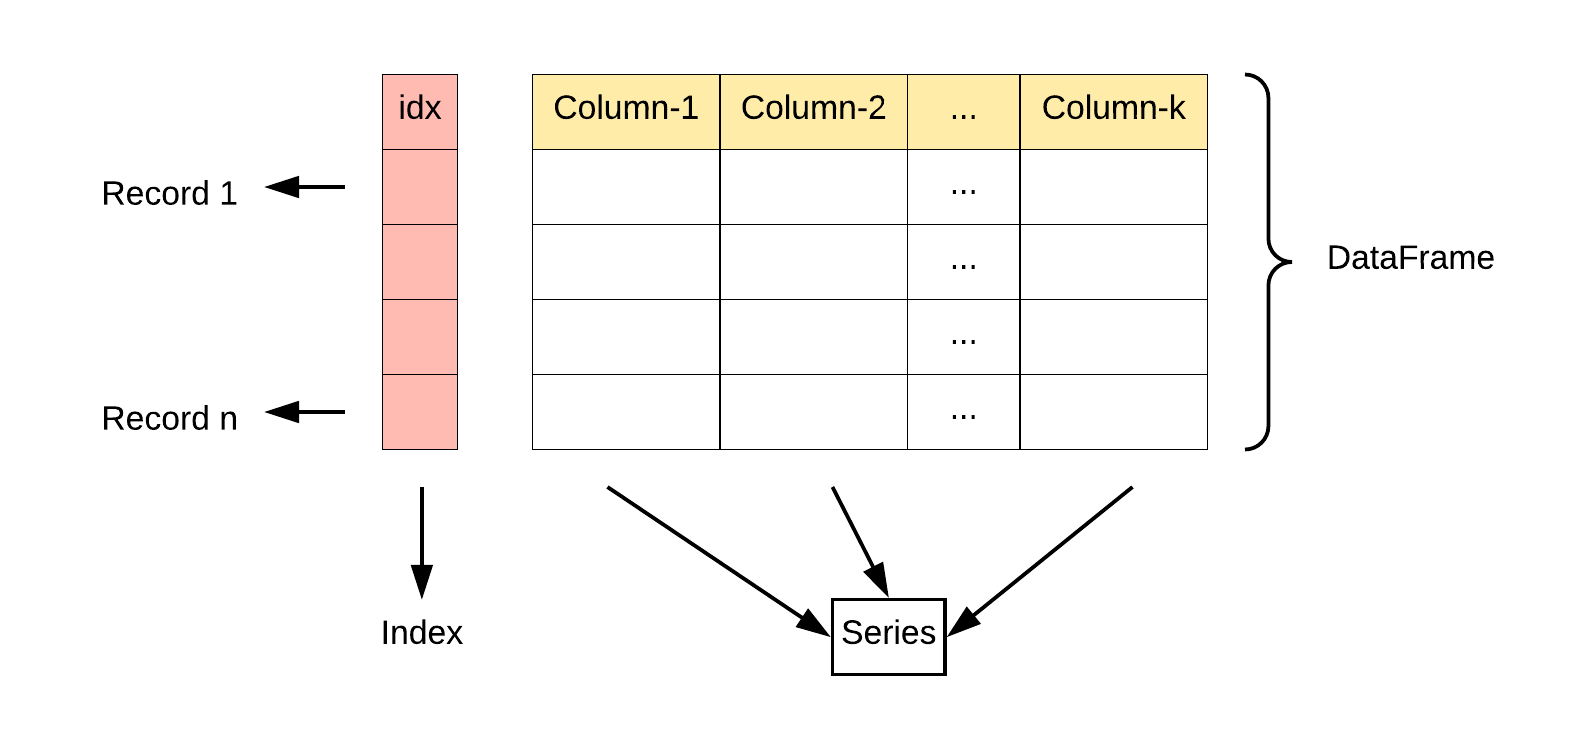

In [15]:
df.values

array([[0.71824274, 0.62414713],
       [0.53688035, 0.49068777],
       [0.17516904, 0.54789811]])

In [16]:
df.columns

Index(['foo', 'bar'], dtype='object')

In [17]:
df.index

Index(['a', 'b', 'c'], dtype='object')

Indexing refers to columns

In [18]:
df['foo']

a    0.718243
b    0.536880
c    0.175169
Name: foo, dtype: float64

Slicing refers to rows

In [19]:
df['a':'b']

,foo,bar
a,0.718243,0.624147
b,0.536880,0.490688


In [20]:
df['b':]

,foo,bar
b,0.536880,0.490688
c,0.175169,0.547898


Masking refers to rows

In [21]:
df[df['foo'] > 0.5]

,foo,bar
a,0.718243,0.624147
b,0.536880,0.490688


In [22]:
df[df['foo'] < 0.5]

,foo,bar
c,0.175169,0.547898


In [23]:
print(df)

        foo       bar
a  0.718243  0.624147
b  0.536880  0.490688
c  0.175169  0.547898


In [24]:
display(df) # Only in notebooks

,foo,bar
a,0.718243,0.624147
b,0.536880,0.490688
c,0.175169,0.547898


## Loading data

We're going to use the Titanic dataset.

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [29]:
?pd.read_csv

Reference documentation: [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [26]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Upload data to Colab (**It won't work anywhere else!**)

In [ ]:
# Only works in Google Colab!!!

from google.colab import files
uploaded = files.upload()

# To store dataset in a Pandas Dataframe
import io
df2 = pd.read_csv(io.BytesIO(uploaded['myfilename.csv']))

## Dataset summaries

In [30]:
data.shape

(891, 15)

In [31]:
data.shape[0]

891

In [32]:
data.shape[1]

15

In [33]:
len(data) # Count rows

891

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [35]:
data.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [36]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
data.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


New concept: NaN (*not a number*)

In [38]:
data['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [39]:
data['class'].nunique()

3

## Data selection by column

In [40]:
data["fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [41]:
data.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [42]:
data[["class", "sex", "fare"]]

,class,sex,fare
0,Third,male,7.2500
1,First,female,71.2833
2,Third,female,7.9250
3,First,female,53.1000
4,Third,male,8.0500
...,...,...,...
886,Second,male,13.0000
887,First,female,30.0000
888,Third,female,23.4500
889,First,male,30.0000


## Data selection by row

In [43]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [45]:
data[data['class'] == "First"];

In [46]:
data[data['age'] < 30];

In [47]:
data.drop_duplicates();

In [48]:
data.nlargest(3, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True


In [49]:
data.nsmallest(3, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False


In [ ]:
data[5, 5] # Error!

## loc, iloc and at indexers

**loc[]**: Explicit index

In [60]:
data.loc[:, 'age':'fare'].head()

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [61]:
data.loc[data['age'] < 10, ['class','sex']];

**iloc[]**: Implicit index

In [64]:
data.iloc[3]

survived                 1
pclass                   1
sex                 female
age                   35.0
sibsp                    1
parch                    0
fare                  53.1
embarked                 S
class                First
who                  woman
adult_male           False
deck                     C
embark_town    Southampton
alive                  yes
alone                False
Name: 3, dtype: object

In [70]:
data.iloc[[1,5, 10]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False


In [65]:
data.iloc[3, 3]

35.0

In [67]:
data.iloc[:, [1,2,6]].head() # Returns columns 1, 2 and 6

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [68]:
data.iloc[5:10] 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


*at[]* and *iat[]*: Selecting single elements from a DataFrame.

In [71]:
data.at[1, "fare"]

71.2833

In [72]:
data.iat[1, 6]

71.2833

Complex queries.

In [74]:
data[(data['age']>10) & (data['age']<15)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
125,1,3,male,12.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
435,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False
542,0,3,female,11.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
683,0,3,male,14.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False


In [75]:
data.query("(age>10) and (age<15)")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
125,1,3,male,12.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
435,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False
542,0,3,female,11.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
683,0,3,male,14.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False


## Missing data

In [86]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Observe method chaining in the cell above.

In [87]:
data['age'].isna().sum()

177

In [88]:
data.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

Handling NaNs.

In [89]:
display(data.head())

data.dropna().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [90]:
print(f"Rows: {len(data)}")
print(f"Rows: {len(data.dropna())}")

Rows: 891
Rows: 182


In [93]:
cleanData = data.fillna("FILLED")

display(data['deck'].head())
display(cleanData['deck'].head())

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: deck, dtype: object

0    FILLED
1         C
2    FILLED
3         C
4    FILLED
Name: deck, dtype: object

In [95]:
cleanData = data.fillna(0)

display(data['deck'].head())
display(cleanData['deck'].head())

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: deck, dtype: object

0    0
1    C
2    0
3    C
4    0
Name: deck, dtype: object

## Making new columns

In [106]:
data['sibilings'] = data['sibsp'] + data['parch']

data[data['sibilings'] > 1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sibilings
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,2
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False,6
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,5


## Delete rows and columns

In [107]:
clean = data.drop('sibilings', axis=1); # Delete column

print(data.columns)
print(clean.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'sibilings'],
      dtype='object')
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


Check out the inplace parameter in the following cell

In [108]:
data.drop('sibilings', axis=1, inplace=True); # Delete column in the same dataframe

print(data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [109]:
data.drop(['sibsp', 'parch'], axis=1); # Delete several columns

In [110]:
data.drop([10,12,20], axis=0); # Delete several rows

## Combine dataset

In [112]:
df1 = pd.DataFrame([{'A': 'A0', 'B': 'B0'}, {'A': 'A1', 'B': 'B1'}])
df2 = pd.DataFrame([{'A': 'A2', 'B': 'B2'}, {'A': 'A3', 'B': 'B3'}])

display(df1)
display(df2)

,A,B
0,A0,B0
1,A1,B1


,A,B
0,A2,B2
1,A3,B3


In [113]:
pd.concat([df1, df2])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [117]:
pd.concat([df1, df2], axis=1)

,A,B,A,B
0,A0,B0,A2,B2
1,A1,B1,A3,B3


In [115]:
df3 = df1.append(df2)

df3

/tmp/ipykernel_12591/804901482.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2)


,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


### Renaming columns and indices

In [118]:
df3.index = ["row1", "row2", "row3", "row4"]

df3

,A,B
row1,A0,B0
row2,A1,B1
row3,A2,B2
row4,A3,B3


In [119]:
df3.columns = ["col1", "col2"]

df3

,col1,col2
row1,A0,B0
row2,A1,B1
row3,A2,B2
row4,A3,B3


## Group data

In [120]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [121]:
data.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

<img align="center" src="https://github.com/dfbarrero/dataCourse/raw/master/pandas/figs/03.08-split-apply-combine.png" width="500">


In [149]:
data.groupby('class').mean(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [123]:
data.groupby("class").describe()

survived                                              pclass       ...  \
          count      mean       std  min  25%  50%  75%  max  count mean  ...   
class                                                                     ...   
First     216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  216.0  1.0  ...   
Second    184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  184.0  2.0  ...   
Third     491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0  491.0  3.0  ...   

       parch        fare                                                      \
         75%  max  count       mean        std  min       25%      50%   75%   
class                                                                          
First    0.0  4.0  216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5   
Second   1.0  3.0  184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   
Third    0.0  6.0  491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   

                  
             max  
class             
First   512.3292  
Second   73.5000  
Third    69.5500  

[3 rows x 48 columns]

In [124]:
data.groupby("class").describe().T

class                First      Second       Third
survived count  216.000000  184.000000  491.000000
         mean     0.629630    0.472826    0.242363
         std      0.484026    0.500623    0.428949
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      1.000000    0.000000    0.000000
         75%      1.000000    1.000000    0.000000
         max      1.000000    1.000000    1.000000
pclass   count  216.000000  184.000000  491.000000
         mean     1.000000    2.000000    3.000000
         std      0.000000    0.000000    0.000000
         min      1.000000    2.000000    3.000000
         25%      1.000000    2.000000    3.000000
         50%      1.000000    2.000000    3.000000
         75%      1.000000    2.000000    3.000000
         max      1.000000    2.000000    3.000000
age      count  186.000000  173.000000  355.000000
         mean    38.233441   29.877630   25.140620
         std     14.802856   14.001077   12.495398
         min      0.920000    0.670000    0.420000
         25%     27.000000   23.000000   18.000000
         50%     37.000000   29.000000   24.000000
         75%     49.000000   36.000000   32.000000
         max     80.000000   70.000000   74.000000
sibsp    count  216.000000  184.000000  491.000000
         mean     0.416667    0.402174    0.615071
         std      0.611898    0.601633    1.374883
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      1.000000    1.000000    1.000000
         max      3.000000    3.000000    8.000000
parch    count  216.000000  184.000000  491.000000
         mean     0.356481    0.380435    0.393075
         std      0.693997    0.690963    0.888861
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      0.000000    1.000000    0.000000
         max      4.000000    3.000000    6.000000
fare     count  216.000000  184.000000  491.000000
         mean    84.154687   20.662183   13.675550
         std     78.380373   13.417399   11.778142
         min      0.000000    0.000000    0.000000
         25%     30.923950   13.000000    7.750000
         50%     60.287500   14.250000    8.050000
         75%     93.500000   26.000000   15.500000
         max    512.329200   73.500000   69.550000

In [125]:
data.groupby('class').aggregate(np.mean)

/tmp/ipykernel_12591/297564763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('class').aggregate(np.mean)


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [126]:
data.groupby('class').aggregate(np.mean)['age']

/tmp/ipykernel_12591/3023927026.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('class').aggregate(np.mean)['age']


class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [127]:
data.groupby('class').aggregate(['min', np.median, max])

/tmp/ipykernel_12591/4231527870.py:1: FutureWarning: ['sex', 'embarked', 'who', 'deck', 'embark_town', 'alive'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('class').aggregate(['min', np.median, max])


survived            pclass              age              sibsp  ...  \
            min median max    min median max   min median   max   min  ...   
class                                                                  ...   
First         0    1.0   1      1    1.0   1  0.92   37.0  80.0     0  ...   
Second        0    0.0   1      2    2.0   2  0.67   29.0  70.0     0  ...   
Third         0    0.0   1      3    3.0   3  0.42   24.0  74.0     0  ...   

       parch fare                    adult_male               alone         \
         max  min   median       max        min median   max    min median   
class                                                                        
First      4  0.0  60.2875  512.3292      False    1.0  True  False    1.0   
Second     3  0.0  14.2500   73.5000      False    1.0  True  False    1.0   
Third      6  0.0   8.0500   69.5500      False    1.0  True  False    1.0   

              
         max  
class         
First   True  
Second  True  
Third   True  

[3 rows x 24 columns]

In [128]:
for (name, group) in data.groupby('class'):
    print(name)
    display(group)
    print("\n")

First


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True




Second


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True




Third


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


## Iterate over a dataframe

In [129]:
for key in data.keys():
    print(key)

survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


In [130]:
for index, row in data.head(3).iterrows():
    print(index)
    print(row)

0
survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object
1
survived               1
pclass                 1
sex               female
age                 38.0
sibsp                  1
parch                  0
fare             71.2833
embarked               C
class              First
who                woman
adult_male         False
deck                   C
embark_town    Cherbourg
alive                yes
alone              False
Name: 1, dtype: object
2
survived                 1
pclass                   3
sex                 female
age                   26.0
sibsp                    0
parch                    0
fare  

## Correlations

In [141]:
data.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## Plots

First we must prepare the graphical device.

In [132]:
%matplotlib inline

We are ready to plot.

<AxesSubplot: >

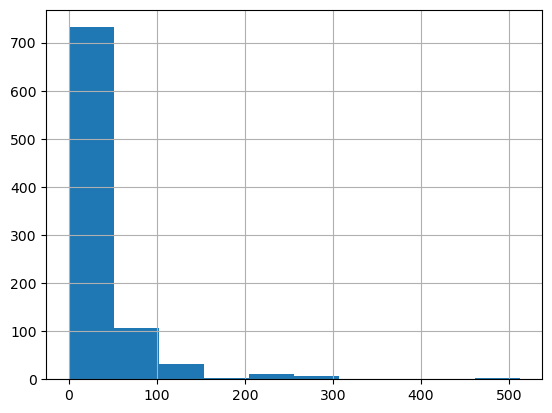

In [133]:
data['fare'].hist()

<AxesSubplot: xlabel='age', ylabel='fare'>

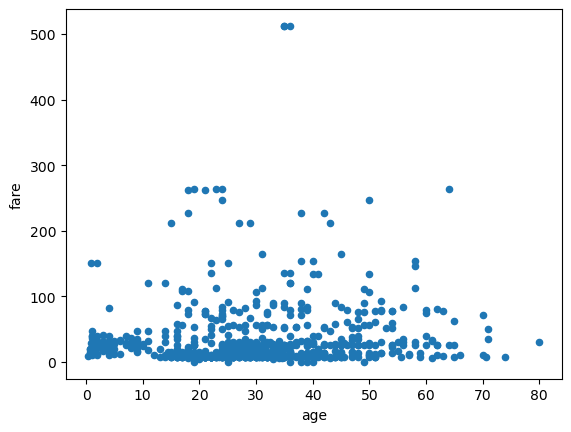

In [134]:
data.plot.scatter(x="age", y="fare")

<AxesSubplot: >

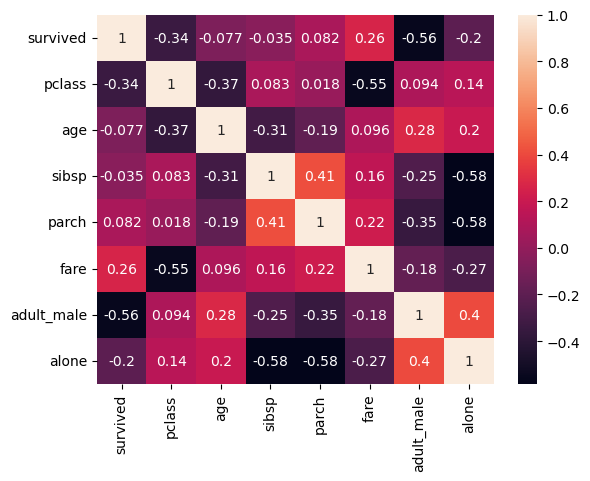

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(numeric_only = True), annot=True)

## Exercises

Select one of the following two datasets:

In [148]:
import seaborn as sns

#planets = sns.load_dataset('planets')
#mpg = sns.load_dataset('mpg')

1.- Visualize your raw data.

2.- Identify the columns with its datatype.

3.- Remove any column without interest.

4.- Obtain some summary statistics.

5.- Determine the number of NaNs that your dataset contain.

6.- Remove those rows with NaNs.

7.- Identify the groups of data with most interest.

8.- Compute the number of rows in each group.

9.- Obtain the main statistics (mean, mode, median, standard deviation, maximum and minimum) of each group.

10.- Visualize an histogram of each variable of interest.

11.- For each group of interest, visualize an histogram of any column of your interest. Do it placing one histogram in one cell, use as many cells as you need. Take a subset of your dataset in each cell. (Next week we will learn a more convenient way to do it).

12.- Visualize an scatterplot for each pair of attributes of interest. Place each plot in a different cell, using as many cells as you need.